In [1]:
library(pacman)
library(ggplot2)
library(glmnet)  
library(dplyr)   
library(tidyverse)
library(caret)
library(mapplots)

Warning message:
"package 'pacman' was built under R version 3.6.3"Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [2]:
# Loading League Data

LeagueDF <- read.csv("C:\\Users\\Preston Robertson\\OneDrive - Mississippi State University\\Documents\\Graduate\\League Of Legends\\All datasets\\base_def.csv")

In [3]:
# Basic Analysis

## Base Data

dat <- LeagueDF
head(dat)


X,Champ,Team,GoldEarned,Kills,Deaths,Assists,Win,totalDamageDealtToChampions,damageDealtToTurrets,...,totalMinionsKilled,champLevel,wardsPlaced,firstBloodKill,firstBloodAssist,WRgeneral,WRchamp,Duration_secs,Position,Role
1,Garen,100,10913,3,13,6,FALSE,14015,0,...,205,16,10,FALSE,FALSE,0.6000,0.5556,2157,TOP,SOLO
2,Irelia,100,11004,10,3,3,TRUE,13895,6226,...,162,13,6,FALSE,FALSE,0.8000,0.8824,1216,MIDDLE,SOLO
3,Kayn,100,13191,10,8,15,TRUE,29583,2259,...,33,16,3,FALSE,FALSE,0.5667,0.8333,1949,JUNGLE,NONE
4,Tristana,100,7025,2,6,3,FALSE,11439,793,...,138,10,8,FALSE,FALSE,0.4000,0.0000,1449,BOTTOM,DUO_CARRY
5,Jhin,200,10867,4,4,8,TRUE,13623,800,...,158,13,9,FALSE,FALSE,0.4667,1.0000,1675,BOTTOM,DUO_CARRY
6,Sion,200,13949,6,7,8,TRUE,34755,10821,...,255,18,17,FALSE,FALSE,0.6333,1.0000,2071,TOP,SOLO


In [4]:
# Feature Engineering

## For Champ Wheels

# Popping "Champ"
Champ <- dat %>% pull(Champ)

# Removing all not non-integer values
dat_num <- dat %>% select_if(is.numeric)
dat_num

# Combining data frames
champ2 <- data.frame(Champ)
dat_num2 <- cbind(champ2, dat_num)
dat_num2


X,Team,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,inhibitorKills,totalMinionsKilled,champLevel,wardsPlaced,WRgeneral,WRchamp,Duration_secs
1,100,10913,3,13,6,14015,0,24,38262,0,0,205,16,10,0.6000,0.5556,2157
2,100,11004,10,3,3,13895,6226,10,14749,3,0,162,13,6,0.8000,0.8824,1216
3,100,13191,10,8,15,29583,2259,18,48254,0,0,33,16,3,0.5667,0.8333,1949
4,100,7025,2,6,3,11439,793,21,15039,0,0,138,10,8,0.4000,0.0000,1449
5,200,10867,4,4,8,13623,800,12,11402,0,0,158,13,9,0.4667,1.0000,1675
6,200,13949,6,7,8,34755,10821,39,47226,5,0,255,18,17,0.6333,1.0000,2071
7,100,11485,9,2,10,18840,2849,24,18754,1,0,167,15,12,0.6333,1.0000,1560
8,100,6600,2,2,4,7118,1179,9,7520,1,1,119,11,7,0.6667,0.7600,1087
9,200,9116,2,7,0,10936,695,17,17996,0,0,198,14,8,0.5333,0.5714,1633
10,200,11640,5,6,6,23732,1048,22,16038,0,0,223,15,11,0.4667,0.5000,1584


Champ,X,Team,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,inhibitorKills,totalMinionsKilled,champLevel,wardsPlaced,WRgeneral,WRchamp,Duration_secs
Garen,1,100,10913,3,13,6,14015,0,24,38262,0,0,205,16,10,0.6000,0.5556,2157
Irelia,2,100,11004,10,3,3,13895,6226,10,14749,3,0,162,13,6,0.8000,0.8824,1216
Kayn,3,100,13191,10,8,15,29583,2259,18,48254,0,0,33,16,3,0.5667,0.8333,1949
Tristana,4,100,7025,2,6,3,11439,793,21,15039,0,0,138,10,8,0.4000,0.0000,1449
Jhin,5,200,10867,4,4,8,13623,800,12,11402,0,0,158,13,9,0.4667,1.0000,1675
Sion,6,200,13949,6,7,8,34755,10821,39,47226,5,0,255,18,17,0.6333,1.0000,2071
Zoe,7,100,11485,9,2,10,18840,2849,24,18754,1,0,167,15,12,0.6333,1.0000,1560
Azir,8,100,6600,2,2,4,7118,1179,9,7520,1,1,119,11,7,0.6667,0.7600,1087
Jayce,9,200,9116,2,7,0,10936,695,17,17996,0,0,198,14,8,0.5333,0.5714,1633
Heimerdinger,10,200,11640,5,6,6,23732,1048,22,16038,0,0,223,15,11,0.4667,0.5000,1584


In [5]:
## Aggregating Data

agg = suppressWarnings(aggregate(dat_num2,
                by = list(dat_num2$Champ),
                FUN = mean))
agg


Champion <- agg %>% pull(Group.1)


norm <- apply(agg %>% select_if(is.numeric),2,function(x){x/sum(x)})
norm2 <- data.frame(norm)
norm3 <- cbind(Champion, norm2)
norm3

Group.1,Champ,X,Team,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,inhibitorKills,totalMinionsKilled,champLevel,wardsPlaced,WRgeneral,WRchamp,Duration_secs
Aatrox,NA,11988.26,147.6000,10235.364,4.508000,4.704000,4.904000,15595.524,2574.4000,18.55200,26962.95,0.9800000,0.10400000,160.92000,14.20000,9.004000,0.4995984,0.5024536,1572.144
Ahri,NA,13754.34,142.8571,9179.914,4.771429,5.657143,6.371429,16764.371,2056.6857,18.77143,16005.34,0.8000000,0.20000000,136.65714,13.14286,8.628571,0.5257114,0.4429800,1566.286
Akali,NA,13413.08,153.9773,10645.534,6.130682,5.386364,4.744318,17453.926,1798.8693,18.89205,22512.48,0.7954545,0.10227273,171.87500,14.29545,9.147727,0.5122381,0.4506767,1618.557
Alistar,NA,14167.71,135.5556,7541.244,1.866667,6.200000,13.177778,7589.600,988.8889,50.26667,21195.04,0.4000000,0.04444444,33.51111,12.28889,26.044444,0.5148089,0.5509689,1673.111
Amumu,NA,13760.27,153.3333,10309.467,5.333333,5.733333,9.866667,14960.000,955.8667,22.33333,25901.53,0.6000000,0.13333333,34.26667,13.80000,6.200000,0.5200067,0.4519933,1649.533
Anivia,NA,12097.67,153.3333,12636.933,7.000000,5.333333,9.133333,23363.400,3385.3333,21.40000,28918.53,0.8000000,0.26666667,182.80000,15.73333,10.800000,0.5466733,0.6262600,1912.800
Annie,NA,12423.36,149.1803,10911.475,6.983607,5.180328,6.737705,21196.443,2698.5902,22.45902,16796.66,0.9180328,0.19672131,152.85246,14.04918,9.754098,0.5409803,0.4946000,1643.410
Aphelios,NA,12644.80,149.4774,11419.070,5.404181,5.275261,5.914634,18831.895,4816.6969,21.37979,15289.87,1.6829268,0.23693380,189.09582,13.22474,8.214286,0.5256679,0.5095510,1580.956
Ashe,NA,12828.21,148.2759,11248.011,4.954023,5.494253,8.344828,17359.034,3368.2184,24.35632,16465.14,1.1954023,0.11494253,176.22989,13.42529,8.160920,0.5233770,0.4962195,1674.517
AurelionSol,NA,13229.67,140.0000,9348.400,4.233333,3.400000,6.700000,14886.600,1311.3667,18.63333,16142.20,0.4000000,0.03333333,165.70000,13.33333,8.633333,0.5244400,0.5119267,1468.833


Champion,Champ,X,Team,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,inhibitorKills,totalMinionsKilled,champLevel,wardsPlaced,WRgeneral,WRchamp,Duration_secs
Aatrox,NA,0.006394578,0.006662391,0.006732419,0.006075851,0.006309460,0.004508957,0.006855424,0.006383719,0.004804203,0.008733274,0.006411648,0.004535296,0.009186296,0.007056562,0.005448849,0.006531260,0.006641374,0.006590457
Ahri,NA,0.007336615,0.006448307,0.006038185,0.006430899,0.007587907,0.005858177,0.007369222,0.005099947,0.004861026,0.005184115,0.005233999,0.008721722,0.007801224,0.006531225,0.005221656,0.006872636,0.005855259,0.006565899
Akali,NA,0.007154584,0.006950249,0.007002212,0.008262891,0.007224712,0.004362139,0.007672334,0.004460642,0.004892261,0.007291770,0.005204260,0.004459972,0.009811674,0.007103998,0.005535827,0.006696499,0.005956993,0.006785021
Alistar,NA,0.007557107,0.006118727,0.004960333,0.002515880,0.008316040,0.012116240,0.003336209,0.002452140,0.013016994,0.006865054,0.002616999,0.001938161,0.001913019,0.006106853,0.015761024,0.006730107,0.007282643,0.007013713
Amumu,NA,0.007339775,0.006921183,0.006781160,0.007188230,0.007690101,0.009071856,0.006576063,0.002370255,0.005783412,0.008389481,0.003925499,0.005814482,0.001956151,0.006857786,0.003751984,0.006798058,0.005974396,0.006914875
Anivia,NA,0.006452938,0.006921183,0.008312076,0.009434552,0.007153583,0.008397596,0.010269999,0.008394584,0.005541718,0.009366685,0.005233999,0.011628963,0.010435340,0.007818539,0.006535715,0.007146672,0.008277832,0.008018494
Annie,NA,0.006626664,0.006733724,0.007177138,0.009412457,0.006948357,0.006194948,0.009317456,0.006691673,0.005815959,0.005440420,0.006006228,0.008578743,0.008725752,0.006981614,0.005902778,0.007072247,0.006537566,0.006889205
Aphelios,NA,0.006744781,0.006747131,0.007511013,0.007283718,0.007075691,0.005438180,0.008278057,0.011943925,0.005536484,0.004952374,0.011010546,0.010332354,0.010794744,0.006571915,0.004970947,0.006872068,0.006735187,0.006627399
Ashe,NA,0.006842611,0.006692898,0.007398498,0.006676998,0.007369423,0.007672609,0.007630622,0.008352145,0.006307283,0.005333042,0.007820918,0.005012484,0.010060278,0.006671576,0.004938652,0.006842119,0.006558973,0.007019608
AurelionSol,NA,0.007056751,0.006319341,0.006149009,0.005705658,0.004560409,0.006160280,0.006543798,0.003251786,0.004825265,0.005228443,0.002616999,0.001453620,0.009459168,0.006625880,0.005224537,0.006856015,0.006766588,0.006157377


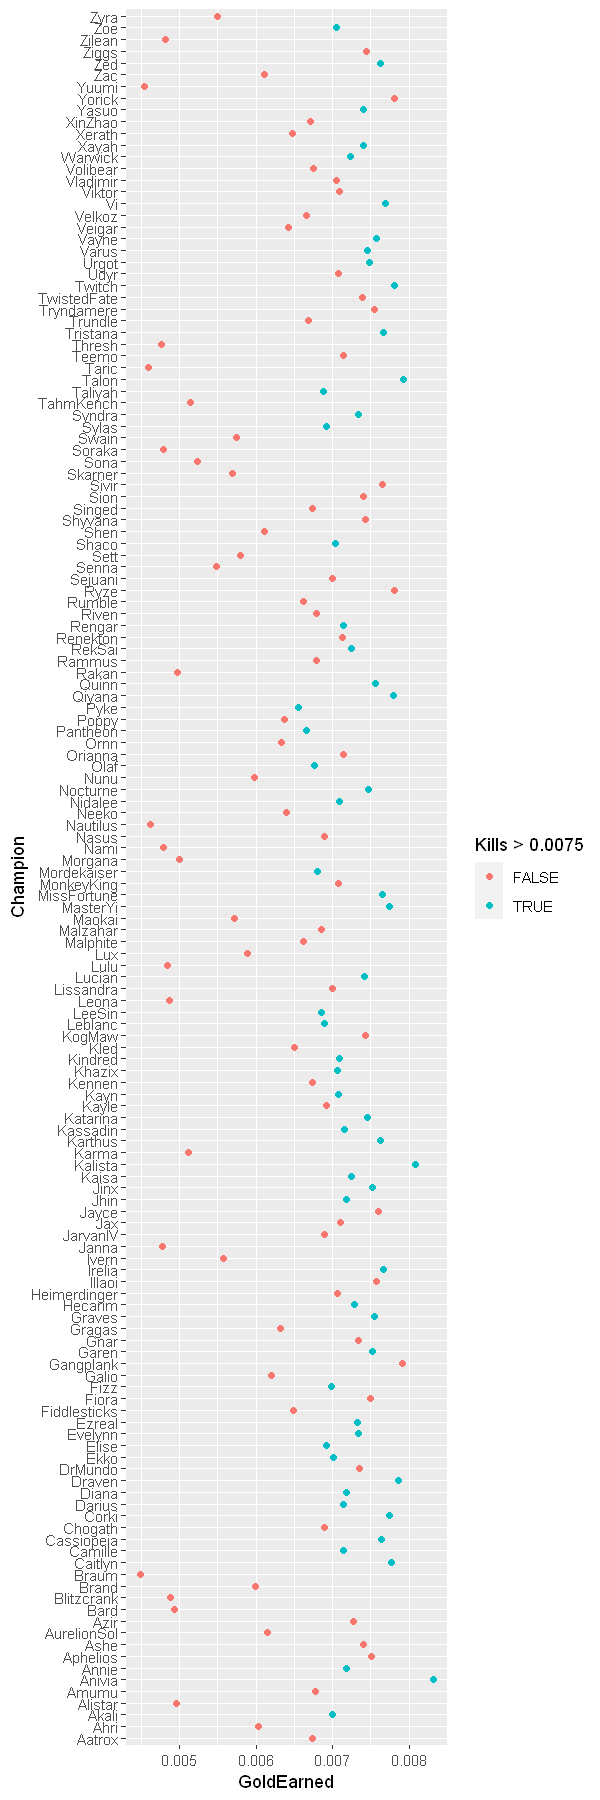

In [8]:
# Data Visualization

## Does the Champion have a defining role?

# Resizing Plot

options(repr.plot.width = 5, repr.plot.height = 15)

# Making Plot
ggplot(data = norm3) +
  geom_point(mapping = aes(y = Champion, x = GoldEarned, color = Kills > 0.0075))

